In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gigant70/andan_project_-/main/ufc_data.csv')
df.head()

,Unnamed: 0,Fighter Name,Nickname,Height,Weight,Reach,Stance,Win,Lose,Draw
0,0,Tom Aaron,NaN,--,155 lbs.,--,NaN,5,3,0
1,1,Danny Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0
2,2,Nariman Abbasov,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0
3,3,David Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0
4,4,Hamdy Abdelwahab,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0


### **1) Причешем данные - Предварительныя обработка **

In [ ]:
df = df.drop(['Nickname'], axis = 1) #Удалили прозвища, потому что они не нужны
df = df.drop(['Unnamed: 0'], axis = 1) #Тоже ненужная колонка
df.head()

,Fighter Name,Height,Weight,Reach,Stance,Win,Lose,Draw
0,Tom Aaron,--,155 lbs.,--,NaN,5,3,0
1,Danny Abbadi,"5' 11""",155 lbs.,--,Orthodox,4,6,0
2,Nariman Abbasov,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0
3,David Abbott,"6' 0""",265 lbs.,--,Switch,10,15,0
4,Hamdy Abdelwahab,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0


In [ ]:
df.isnull().sum()

Fighter Name      0
Height            0
Weight            0
Reach             0
Stance          861
Win               0
Lose              0
Draw              0
dtype: int64

In [ ]:
df = df.dropna()
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3297 entries, 1 to 4156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Fighter Name  3297 non-null   object
 1   Height        3297 non-null   object
 2   Weight        3297 non-null   object
 3   Reach         3297 non-null   object
 4   Stance        3297 non-null   object
 5   Win           3297 non-null   int64 
 6   Lose          3297 non-null   int64 
 7   Draw          3297 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 231.8+ KB
None


,Fighter Name,Height,Weight,Reach,Stance,Win,Lose,Draw
1,Danny Abbadi,"5' 11""",155 lbs.,--,Orthodox,4,6,0
2,Nariman Abbasov,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0
3,David Abbott,"6' 0""",265 lbs.,--,Switch,10,15,0
4,Hamdy Abdelwahab,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0
6,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76.0""",Orthodox,20,8,0


In [ ]:
def correct_values(value):
    # Убираем 'lbs' из строки
    value = value.replace(' lbs.', '').replace('"', '')

    # Заменяем '—' на None
    if '--' in value:
        value = np.NAN

    return value

In [ ]:
df['Weight'] = df['Weight'].map(correct_values, na_action = 'ignore' )
df['Reach'] = df['Reach'].map(correct_values, na_action = 'ignore')
df = df.dropna()
df.head()

<ipython-input-90-d21cb26fa4c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].map(correct_values, na_action = 'ignore' )
<ipython-input-90-d21cb26fa4c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reach'] = df['Reach'].map(correct_values, na_action = 'ignore')


,Fighter Name,Height,Weight,Reach,Stance,Win,Lose,Draw
2,Nariman Abbasov,"5' 8""",155,66.0,Orthodox,28,4,0
4,Hamdy Abdelwahab,"6' 2""",264,72.0,Southpaw,5,0,0
6,Shamil Abdurakhimov,"6' 3""",235,76.0,Orthodox,20,8,0
8,Daichi Abe,"5' 11""",170,71.0,Orthodox,6,2,0
11,Klidson Abreu,"6' 0""",205,74.0,Orthodox,15,4,0


In [ ]:
def imperial_to_metric(height):
    if height is None:
        return (0, 0)
    else:
         if "' " in height:
        #Разделяем значение на футы и дюймы
          feet, inches = height.split("' ")

        #Преобразуем футы и дюймы в сантиметры
          feet_cm = float(feet) * 30.48
          inches_cm = float(inches[:-1]) * 2.54  # Убираем символ дюйма "
          return (feet_cm, inches_cm)

In [ ]:
# Применяем функцию corrected_value к столбцу "Height"
df['Height_cm'] = df['Height'].map(imperial_to_metric, na_action = 'ignore')

df = df.dropna(subset=['Height_cm']) #убрали пропуски в росте
df['Total_Height_cm'] = df['Height_cm'].apply(lambda x: x[0] + x[1])

#Убрали вспомогательные столбцы
df = df.drop(['Height_cm'], axis = 1)
df = df.drop(['Height'], axis = 1)
df.head()


<ipython-input-92-6ce80350f7d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Height_cm'] = df['Height_cm'].apply(lambda x: x[0] + x[1])


,Fighter Name,Weight,Reach,Stance,Win,Lose,Draw,Total_Height_cm
2,Nariman Abbasov,155,66.0,Orthodox,28,4,0,172.72
4,Hamdy Abdelwahab,264,72.0,Southpaw,5,0,0,187.96
6,Shamil Abdurakhimov,235,76.0,Orthodox,20,8,0,190.50
8,Daichi Abe,170,71.0,Orthodox,6,2,0,180.34
11,Klidson Abreu,205,74.0,Orthodox,15,4,0,182.88


In [ ]:
df.info()
#Понимаем, что нужно перевести Weight и Reach в числовой тип

<class 'pandas.core.frame.DataFrame'>
Index: 2176 entries, 2 to 4156
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fighter Name     2176 non-null   object 
 1   Weight           2176 non-null   object 
 2   Reach            2176 non-null   object 
 3   Stance           2176 non-null   object 
 4   Win              2176 non-null   int64  
 5   Lose             2176 non-null   int64  
 6   Draw             2176 non-null   int64  
 7   Total_Height_cm  2176 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 153.0+ KB


In [ ]:
df['Weight'] = pd.to_numeric(df['Weight'])
df['Reach'] = pd.to_numeric(df['Reach'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2176 entries, 2 to 4156
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fighter Name     2176 non-null   object 
 1   Weight           2176 non-null   int64  
 2   Reach            2176 non-null   float64
 3   Stance           2176 non-null   object 
 4   Win              2176 non-null   int64  
 5   Lose             2176 non-null   int64  
 6   Draw             2176 non-null   int64  
 7   Total_Height_cm  2176 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 153.0+ KB


In [ ]:
#Переведем размах рук в сантиметры и вес в килограммы
df['Weight'] = df['Weight'].apply(lambda x: x * 0.45)
df['Reach'] = df['Reach'].apply(lambda x: x * 2.54)
df.head()

,Fighter Name,Weight,Reach,Stance,Win,Lose,Draw,Total_Height_cm
2,Nariman Abbasov,69.75,167.64,Orthodox,28,4,0,172.72
4,Hamdy Abdelwahab,118.80,182.88,Southpaw,5,0,0,187.96
6,Shamil Abdurakhimov,105.75,193.04,Orthodox,20,8,0,190.50
8,Daichi Abe,76.50,180.34,Orthodox,6,2,0,180.34
11,Klidson Abreu,92.25,187.96,Orthodox,15,4,0,182.88


In [ ]:
df['Weight'].max()

119.25

#Добавим весовую категорию каждому бойцу
* Наилегчайший вес - 56,7 кг
* Легчайший вес - 61,2 кг
* Полулёгкий вес - 65,8 кг
* Лёгкий вес - 70,3 кг
* Полусредний вес - 77,1 кг
* Средний вес - 83,9 кг
* Полутяжёлый вес - 93 кг
* Тяжёлый вес - 120,2 кг



In [ ]:
def weight_category(weight):
    if weight < 56.7:
        return 'Наилегчайший вес'
    elif weight >= 56.7 and weight < 61.2:
        return 'Легчайший вес'
    elif weight >= 61.2 and weight < 65.8:
        return 'Полулёгкий вес'
    elif weight >= 65.8 and weight < 70.3:
        return 'Лёгкий вес'
    elif weight >= 70.3 and weight < 77.1:
        return 'Полусредний вес'
    elif weight >= 77.1 and weight < 83.9:
        return 'Средний вес'
    elif weight >= 83.9 and weight < 93:
        return 'Полутяжёлый вес'
    elif weight >= 93 and weight < 120.2:
        return 'Тяжёлый вес'
df['Weight category'] = df['Weight'].apply(weight_category)
df.head()

,Fighter Name,Weight,Reach,Stance,Win,Lose,Draw,Total_Height_cm,Weight category
2,Nariman Abbasov,69.75,167.64,Orthodox,28,4,0,172.72,Лёгкий вес
4,Hamdy Abdelwahab,118.80,182.88,Southpaw,5,0,0,187.96,Тяжёлый вес
6,Shamil Abdurakhimov,105.75,193.04,Orthodox,20,8,0,190.50,Тяжёлый вес
8,Daichi Abe,76.50,180.34,Orthodox,6,2,0,180.34,Полусредний вес
11,Klidson Abreu,92.25,187.96,Orthodox,15,4,0,182.88,Полутяжёлый вес


## **Визуализация**



In [ ]:
#Создадим новые переменные
df['winrate'] = df['Win'] / (df['Lose'] + df['Win'])
df['BMI'] = df['Weight'] * 10000 / df['Total_Height_cm'].apply(lambda x: x **2)
df.head()

,Fighter Name,Weight,Reach,Stance,Win,Lose,Draw,Total_Height_cm,Weight category,winrate,BMI
2,Nariman Abbasov,69.75,167.64,Orthodox,28,4,0,172.72,Лёгкий вес,0.875000,23.380778
4,Hamdy Abdelwahab,118.80,182.88,Southpaw,5,0,0,187.96,Тяжёлый вес,1.000000,33.626802
6,Shamil Abdurakhimov,105.75,193.04,Orthodox,20,8,0,190.50,Тяжёлый вес,0.714286,29.140058
8,Daichi Abe,76.50,180.34,Orthodox,6,2,0,180.34,Полусредний вес,0.750000,23.522166
11,Klidson Abreu,92.25,187.96,Orthodox,15,4,0,182.88,Полутяжёлый вес,0.789474,27.582520


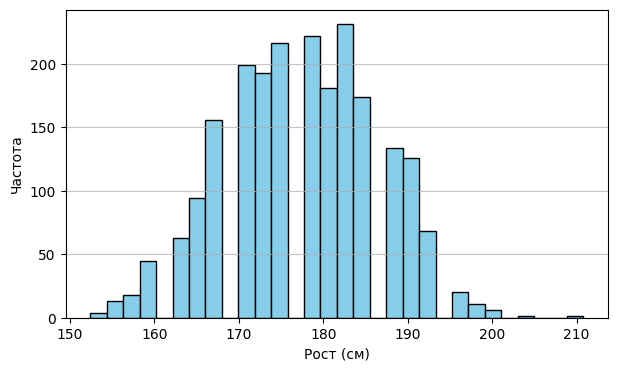

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(df['Total_Height_cm'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

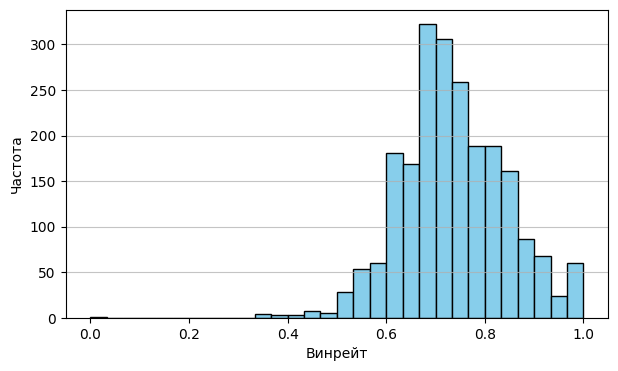

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(df['winrate'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Винрейт')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

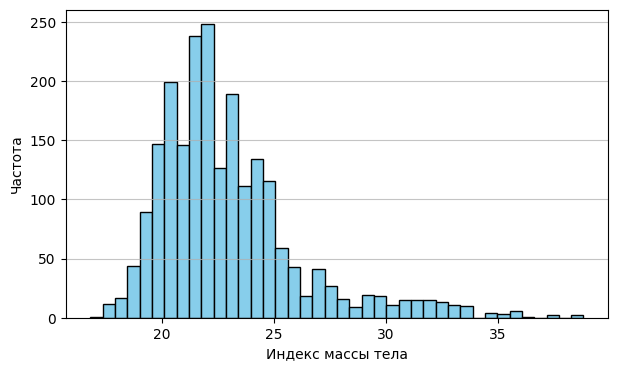

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(df['BMI'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Индекс массы тела')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

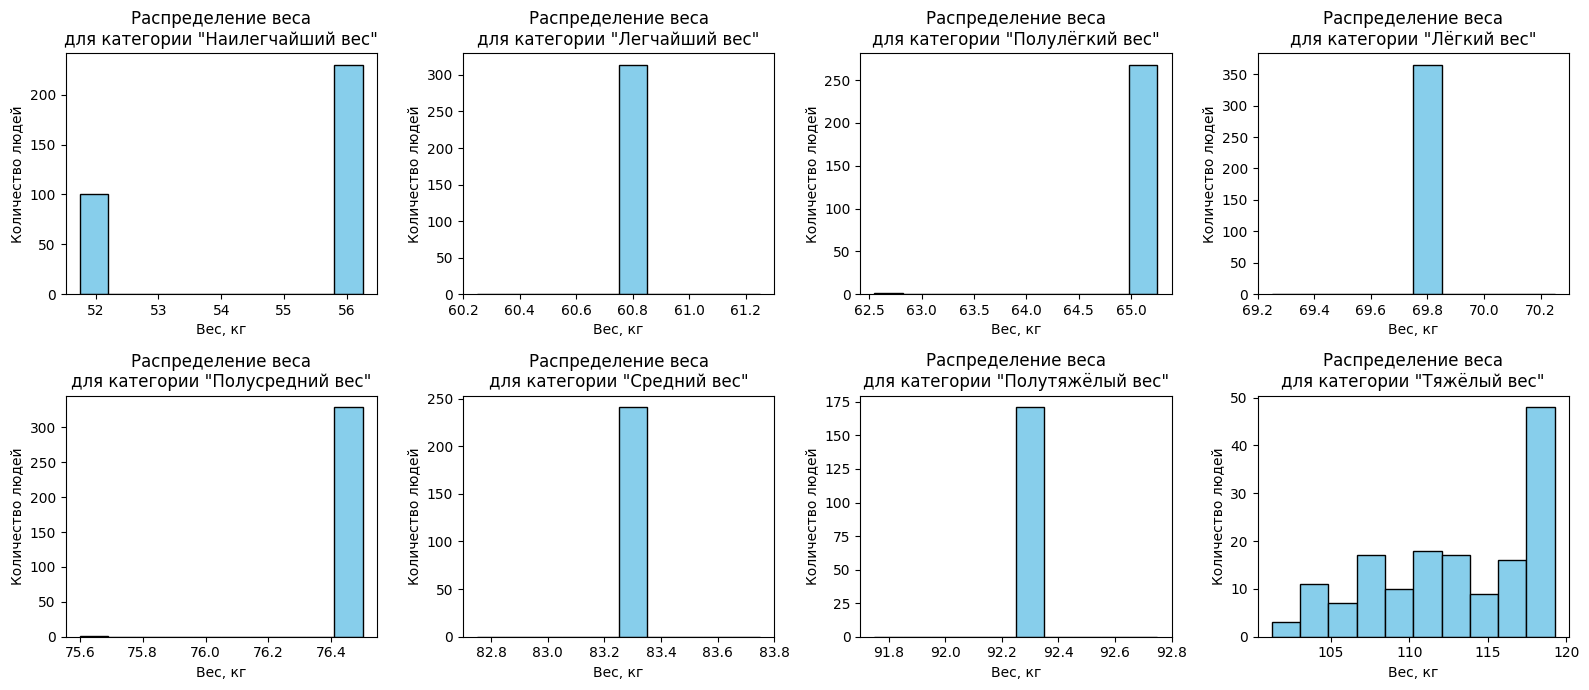

In [ ]:
df1 = df.sort_values(by='Weight', ascending=True)
categories = df1['Weight category'].unique()

fig, axs = plt.subplots(2, 4, figsize=(16, 7))
for i, category in enumerate(categories):
    row = i // 4
    col = i % 4
    ax = axs[row, col]

    ax.hist(df1[df1['Weight category'] == category]['Weight'], bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel('Вес, кг')
    ax.set_ylabel('Количество людей')
    ax.set_title(f'Распределение веса\nдля категории "{category}"')

plt.tight_layout()
plt.show()

In [ ]:
digital_columns = ['Weight', 'Reach', 'Total_Height_cm', 'winrate', 'BMI']
digital_data = df[digital_columns]
corr_matrix = digital_data.corr()
print(corr_matrix)

                   Weight     Reach  Total_Height_cm   winrate       BMI
Weight           1.000000  0.753448         0.790222  0.015503  0.909625
Reach            0.753448  1.000000         0.887867  0.048396  0.498817
Total_Height_cm  0.790222  0.887867         1.000000  0.029613  0.471069
winrate          0.015503  0.048396         0.029613  1.000000  0.002033
BMI              0.909625  0.498817         0.471069  0.002033  1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

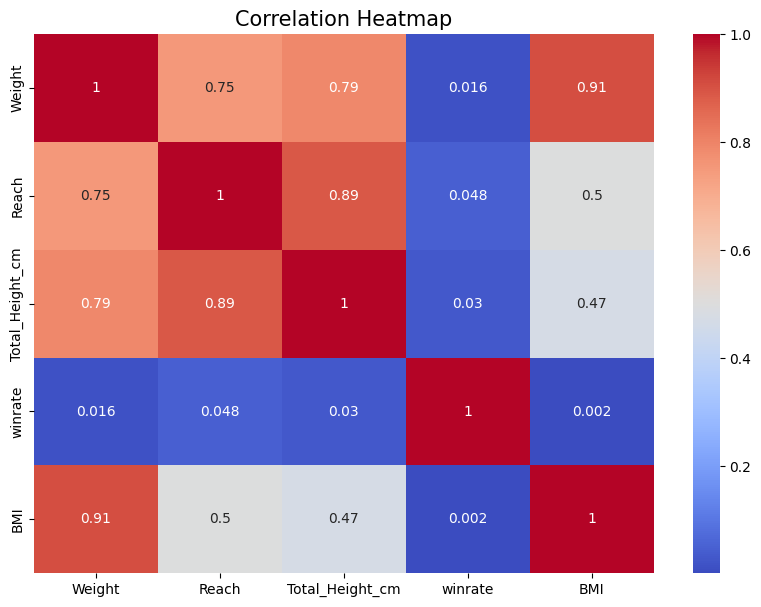

In [ ]:
plt.figure(figsize = (10,7))
corr_df = sns.heatmap(digital_data.corr(), cmap='coolwarm', annot=True, fmt='0.2g');
corr_df.set_title('Correlation Heatmap', fontsize = 15)

In [ ]:
df_encoded = pd.get_dummies(df, columns= ['Stance'])
df_encoded.head()

,Fighter Name,Weight,Reach,Win,Lose,Draw,Total_Height_cm,Weight category,winrate,BMI,Stance_Open Stance,Stance_Orthodox,Stance_Southpaw,Stance_Switch
2,Nariman Abbasov,69.75,167.64,28,4,0,172.72,Лёгкий вес,0.875000,23.380778,False,True,False,False
4,Hamdy Abdelwahab,118.80,182.88,5,0,0,187.96,Тяжёлый вес,1.000000,33.626802,False,False,True,False
6,Shamil Abdurakhimov,105.75,193.04,20,8,0,190.50,Тяжёлый вес,0.714286,29.140058,False,True,False,False
8,Daichi Abe,76.50,180.34,6,2,0,180.34,Полусредний вес,0.750000,23.522166,False,True,False,False
11,Klidson Abreu,92.25,187.96,15,4,0,182.88,Полутяжёлый вес,0.789474,27.582520,False,True,False,False


In [ ]:
df2 = df_encoded.drop('Stance_Open Stance', axis = 1)
df2.head()


,Fighter Name,Weight,Reach,Win,Lose,Draw,Total_Height_cm,Weight category,winrate,BMI,Stance_Orthodox,Stance_Southpaw,Stance_Switch
2,Nariman Abbasov,69.75,167.64,28,4,0,172.72,Лёгкий вес,0.875000,23.380778,True,False,False
4,Hamdy Abdelwahab,118.80,182.88,5,0,0,187.96,Тяжёлый вес,1.000000,33.626802,False,True,False
6,Shamil Abdurakhimov,105.75,193.04,20,8,0,190.50,Тяжёлый вес,0.714286,29.140058,True,False,False
8,Daichi Abe,76.50,180.34,6,2,0,180.34,Полусредний вес,0.750000,23.522166,True,False,False
11,Klidson Abreu,92.25,187.96,15,4,0,182.88,Полутяжёлый вес,0.789474,27.582520,True,False,False


In [ ]:
df2 = df2.replace({True: 1})
df2 = df2.replace({False: 0})
df2 = df2.drop('Stance_Switch', axis=1)
df2.head()

,Fighter Name,Weight,Reach,Win,Lose,Draw,Total_Height_cm,Weight category,winrate,BMI,Stance_Orthodox,Stance_Southpaw
2,Nariman Abbasov,69.75,167.64,28,4,0,172.72,Лёгкий вес,0.875000,23.380778,1,0
4,Hamdy Abdelwahab,118.80,182.88,5,0,0,187.96,Тяжёлый вес,1.000000,33.626802,0,1
6,Shamil Abdurakhimov,105.75,193.04,20,8,0,190.50,Тяжёлый вес,0.714286,29.140058,1,0
8,Daichi Abe,76.50,180.34,6,2,0,180.34,Полусредний вес,0.750000,23.522166,1,0
11,Klidson Abreu,92.25,187.96,15,4,0,182.88,Полутяжёлый вес,0.789474,27.582520,1,0


In [ ]:
df2 = df2.drop(columns=['Win', 'Lose', 'Draw', 'Fighter Name'])

In [ ]:
df2 = pd.get_dummies(df2, columns = ['Weight category'] ,drop_first=True) * 1

In [ ]:
df2['winrate'] = df['winrate'] * 100 #перевели в проценты
df2.head()

,Weight,Reach,Total_Height_cm,winrate,BMI,Stance_Orthodox,Stance_Southpaw,Weight category_Лёгкий вес,Weight category_Наилегчайший вес,Weight category_Полулёгкий вес,Weight category_Полусредний вес,Weight category_Полутяжёлый вес,Weight category_Средний вес,Weight category_Тяжёлый вес
2,69.75,167.64,172.72,87.500000,23.380778,1,0,1,0,0,0,0,0,0
4,118.80,182.88,187.96,100.000000,33.626802,0,1,0,0,0,0,0,0,1
6,105.75,193.04,190.50,71.428571,29.140058,1,0,0,0,0,0,0,0,1
8,76.50,180.34,180.34,75.000000,23.522166,1,0,0,0,0,1,0,0,0
11,92.25,187.96,182.88,78.947368,27.582520,1,0,0,0,0,0,1,0,0


**2. Обучение модели**

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df2, test_size = 0.2)

In [ ]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии
    """

    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.axhline(y=75, color='k', linestyle='--')

    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.axhline(y=75, color='k', linestyle='--')

    plt.title('Test set', fontsize=20)
    pass

In [ ]:
y_train = df_train['winrate'].to_numpy()
y_test = df_test['winrate'].to_numpy()
X_train = df_train.drop('winrate', axis=1)
X_test = df_test.drop('winrate', axis=1)

In [ ]:
X_train.shape, X_test.shape

((1740, 13), (436, 13))

In [ ]:
# Например в качестве метрики качества возьмем MSE

In [ ]:
# Наивный прогноз
from sklearn import metrics
y_mean = np.mean(y_train)
y_pred_naive = np.ones(len(y_test)) * y_mean

def print_mse(y_test,y_pred_naive):
    return metrics.mean_squared_error(y_test,y_pred_naive)
print_mse(y_test, y_pred_naive)

125.7131489368597

In [ ]:
#Линейная регрессия
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()

model_regression.fit(X_train, y_train)

y_pred_test = model_regression.predict(X_test)

y_pred_train = model_regression.predict(X_train)

print('mape on test: {}'.format(print_mse(y_test, y_pred_test)))

print('mape on train: {}'.format(print_mse(y_train, y_pred_train)))

mape on test: 125.38448919290866
mape on train: 112.63251219233635


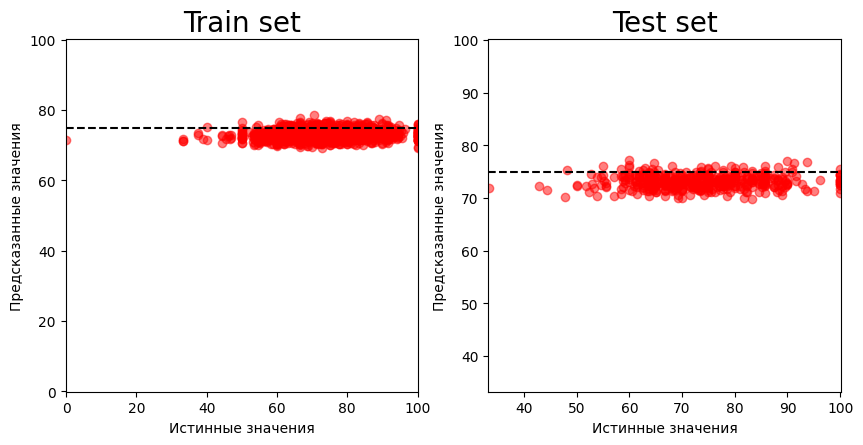

In [ ]:
plot_yreal_ypred(y_test, y_train, y_pred_test, y_pred_train)

In [ ]:
params = model_regression.coef_

In [ ]:
for i in params:
  print(i)

0.11953869131818887
0.09298103327159607
0.09932680262989386
0.516580842443251
-2.303442500007525
-1.896197231632349
-2.5190437987888252
1.403142840772511
-0.5394350094394903
-6.209375266013421
-11.0088596365029
-6.080367477739372
-14.711673956309165


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print('rmse on test: {}'.format(print_mse(y_test, y_pred_test)))

print('rmse on train: {}'.format(print_mse(y_train, y_pred_train)))

rmse on test: 125.38448919290866
rmse on train: 112.63251219233635


По сравнению с регрессией качество прогноза не  изменилось.

In [ ]:
params = model.coef_
for i in params:
  print(i)

-0.007756376864361299
0.0457794562317379
-0.0
-0.0
-0.0
0.0
0.0
-0.0
0.0
-0.0
-0.0
0.0
0.0


Best alpha = 0.0687


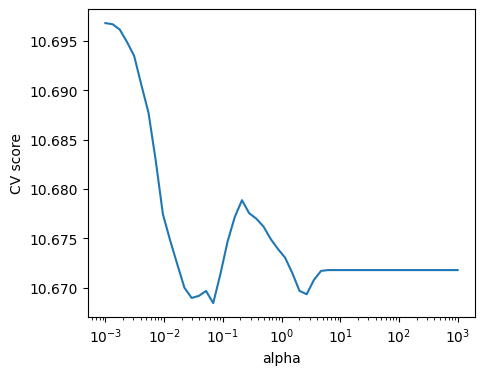

In [ ]:
#Найдем оптимальный гиперпараметр при помощи поиска по решетке
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3, 3, 50)
searcher = GridSearchCV(
    Lasso(), [{"alpha": alphas}],
    scoring="neg_root_mean_squared_error", cv=10
)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.figure(figsize=(5,4))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score");

In [ ]:
    model = Lasso(alpha = best_alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print('rmse on test: {}'.format(print_mse(y_test, y_pred_test)))

print('rmse on train: {}'.format(print_mse(y_train, y_pred_train)))

rmse on test: 125.38448919290866
rmse on train: 112.63251219233635


In [ ]:
params =  model.coef_
for i in params:
  print(i)

-0.01624322658171781
0.09616413608296188
-0.022946005302099837
0.0
-0.7581354223998262
-0.0
0.0
-0.0
0.42390182798638787
-0.9587633697423863
-1.0406684934451362
0.0
0.0


Как видно, модель линейной регрессии неплохо справляется с предсказанием. Однако попытка улучшить ее при помощи Lasso регрессии не дало результатов. Это может быть связанно с изначально неправильной обработкой данных или типа того.